_This blog post was updated on **Saturday, 12 November 2022**._

![](../images/6_ai_in_a_nutshell/thumbnail.png){fig-alt="A circuit board inside a walnut."}

In [2]:
# TODO: Tidyup code.

from fastai.basics import *
from ipywidgets import interact
from IPython.display import display, Markdown

plt.rc('figure', dpi=256)
# plt.rcParams['text.usetex'] = True 

Artificial Intelligence. Machine Learning. Neural Networks. Deep Learning. Fancy Words. Deceptively Simple. All really the same.

The basic workflow to create such a system is below.

:::{.grid}

:::{.g-col-4}
:::


:::{.g-col-4}
```{mermaid}
%%| fig-width: 2
flowchart TB
    A[Function] -- fits --> B[Data]
```
:::

:::{.g-col-4}
:::

:::


Very simple, eh? Of course, it's a very high level abstraction, but this high level view will make this seemingly complex topic very simple.

First, what's the main thing modern AI methods try to do? They try to make predictions about certain things.

So a **function** of sorts is needed to achieve this. A function that can make these predictions. Think of a function as a machine. You put something into the
machine and then, with whatever was input, the machine then produces an output.

The machine that we will be working with has two input slots: one slot is for **training** and the other slot is for predictions.

To create a function that produces predictions, we need to tell the function what sort of predictions it needs to make.

To do that, we can pour some data into the **training** slot. This data will tell the function what sort of predictions to output. This process is known as **fitting** the function to the data.

To fit the function onto data, you **train** the function.

## Simple Case: Quadratic Function

In [3]:
def plot_function(function, title=None, from_x=-2.1, to_x=2.1, y_limit=None, color='r'):
    """Conveniently plots a function."""
    
    # [:, None] transposes the tensor.
    x = torch.linspace(from_x, to_x, 100)[:, None]
    if y_limit: plt.ylim(y_limit)
    
    plt.plot(x, function(x), color)
    if title is not None: plt.title(title)

def train(model, parameters, epochs, learning_rate=0.01, print_output=False, print_graph=True):
    """Conveniently trains a mdoel."""
    f = model(*parameters)
    for epoch in range(epochs):
        loss = mae(f(x), y)
        loss.backward()
        with torch.no_grad(): parameters -= parameters.grad * learning_rate
        f = model(*parameters)
        if print_output:
            print(f"Pass: {epoch}; Loss: {loss}")
    if print_graph:
        f = model(*parameters.detach().numpy())
        plt.scatter(x, y)
        plot_function(f, title=f"MAE: {loss:.2f}")
    return loss

In [4]:
# Create quadratics.
def quadratic(a, b, c, x):
    return a*(x**2) + b*x + c

def make_quadratic(a, b, c):
    return partial(quadratic, a, b, c)

_Gasp!_ A quadratic?? What's this nonsense!

A quadratic is a very simple equation. When shown on a graph, it looks like this.

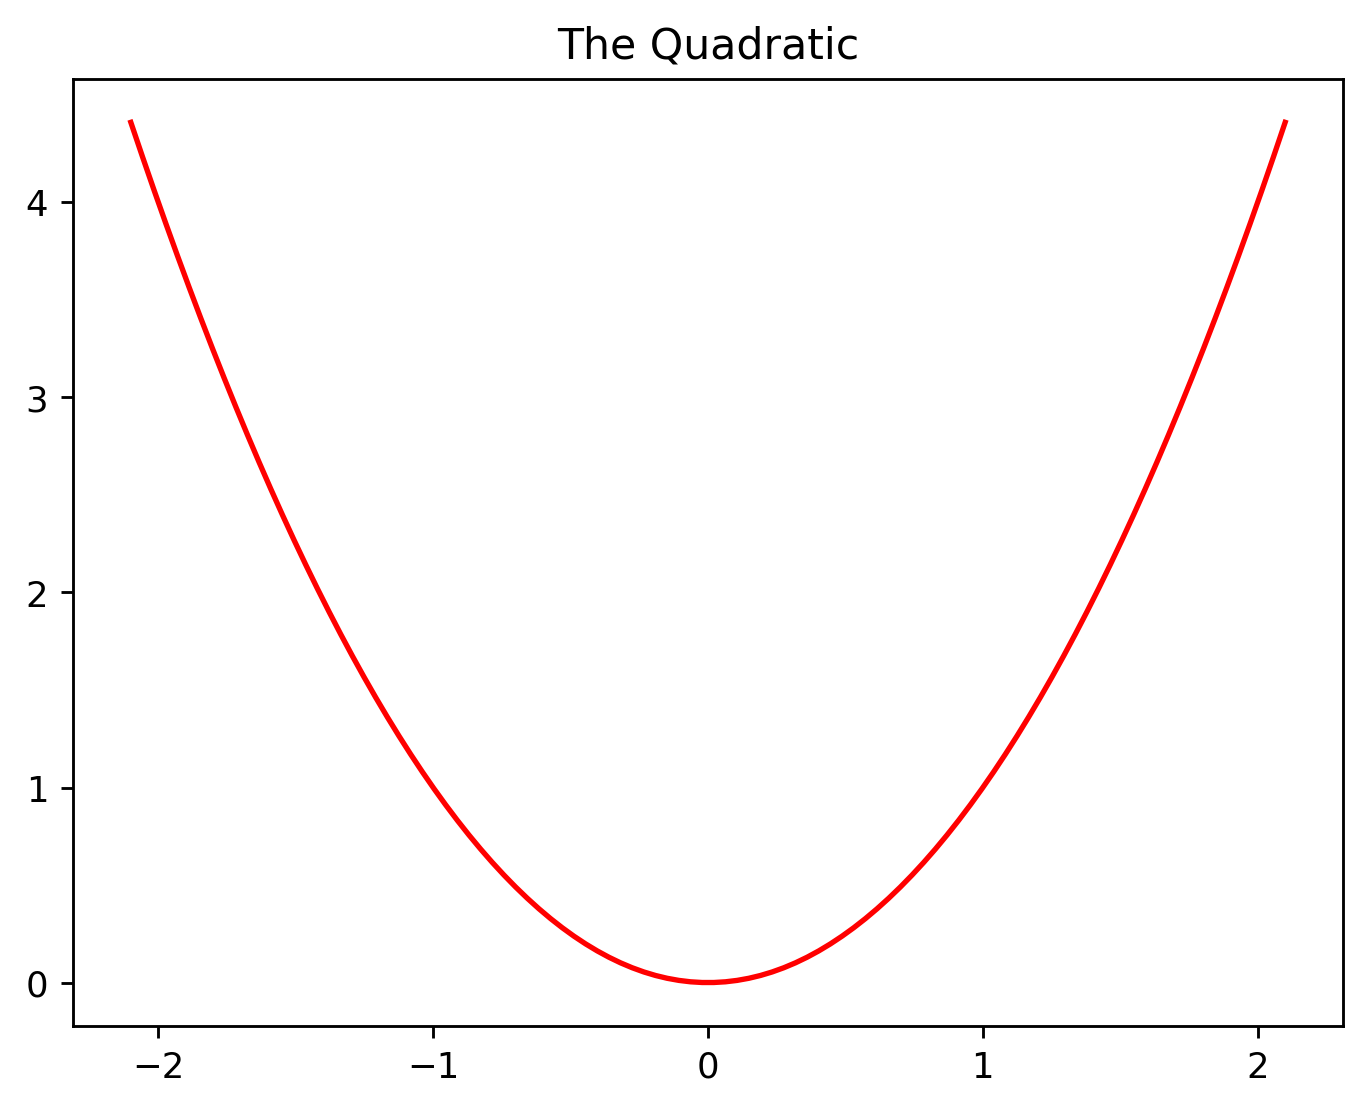

In [5]:
plot_function(make_quadratic(1, 0, 0), title="The Quadratic")

We'll be using this equation to demonstrate a very simple example.

The basic workflow for fitting a function to data is below.

:::{.grid}

:::{.g-col-2}
:::


:::{.g-col-8}
```{mermaid}
%%| fig-width: 3.5
flowchart TB
    B[Calculate Loss] --> C[Calculate Gradients] --> D[Update Parameters] --> B
```
:::

:::{.g-col-2}
:::

:::


It can seem like a lot at first glance; quite a few new terms too.

We'll break this down by going over the very simple example.

Let's say we have the following data points that describe, say, the speed of an object with respect to time. We want to predict what the speed of an
object would be outside these data points.

The horizontal axis is time and the vertical axis is the object's speed.

In [6]:
def noise(x, scale): return np.random.normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)

f = make_quadratic(3, 2, 1)

np.random.seed(42)
x = torch.linspace(-2, 2, steps=20)[:, None]
y = add_noise(f(x), 0.15, 1.5)

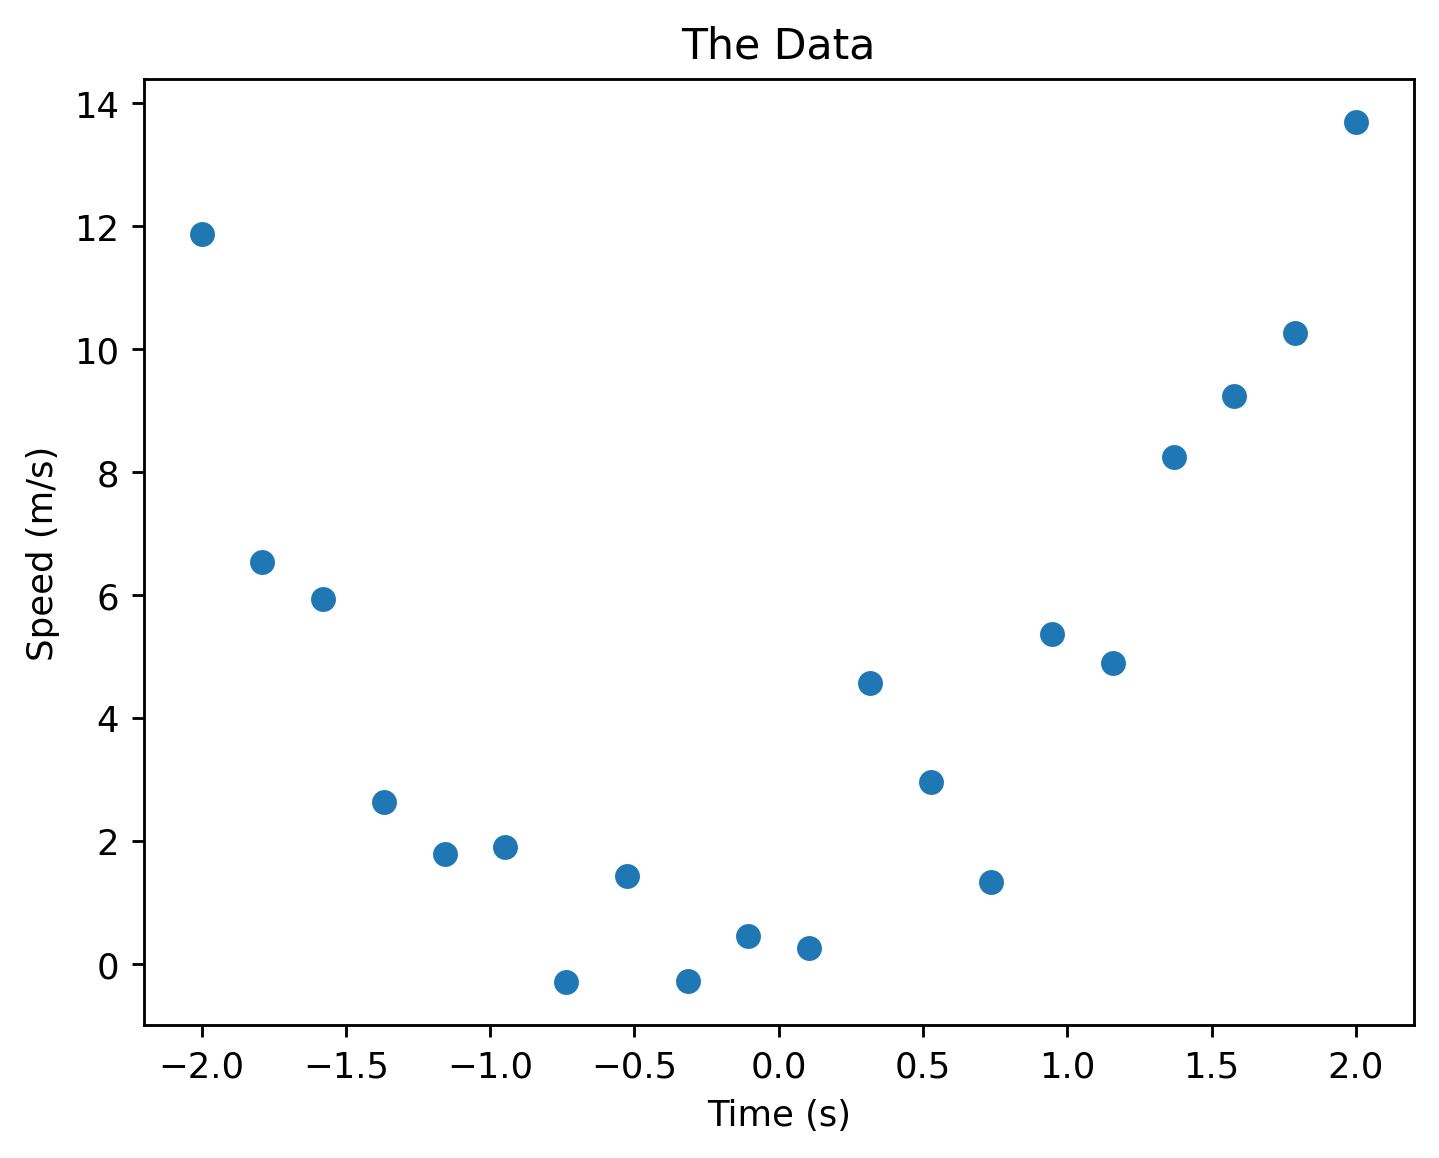

In [7]:
# TODO: Display axes as arrows.
# TODO: Remove negative time.
plt.scatter(x, y)
plt.title("The Data")
plt.xlabel("Time (s)")
plt.ylabel("Speed (m/s)");

We can see that the data looks like the quadratic function shown above! Therefore, we could use the quadratic to predict what the speed of the object would be after 2.0 s and before -2.0 s.

A quadratic equation includes three numbers which we will call $a$, $b$, and $c$. These three numbers affect or control how our quadratic function will end up looking. $a$, $b$, and $c$ are our **parameters**.

Let's let $a$, $b$, and $c$ all equal $1$ to begin with.

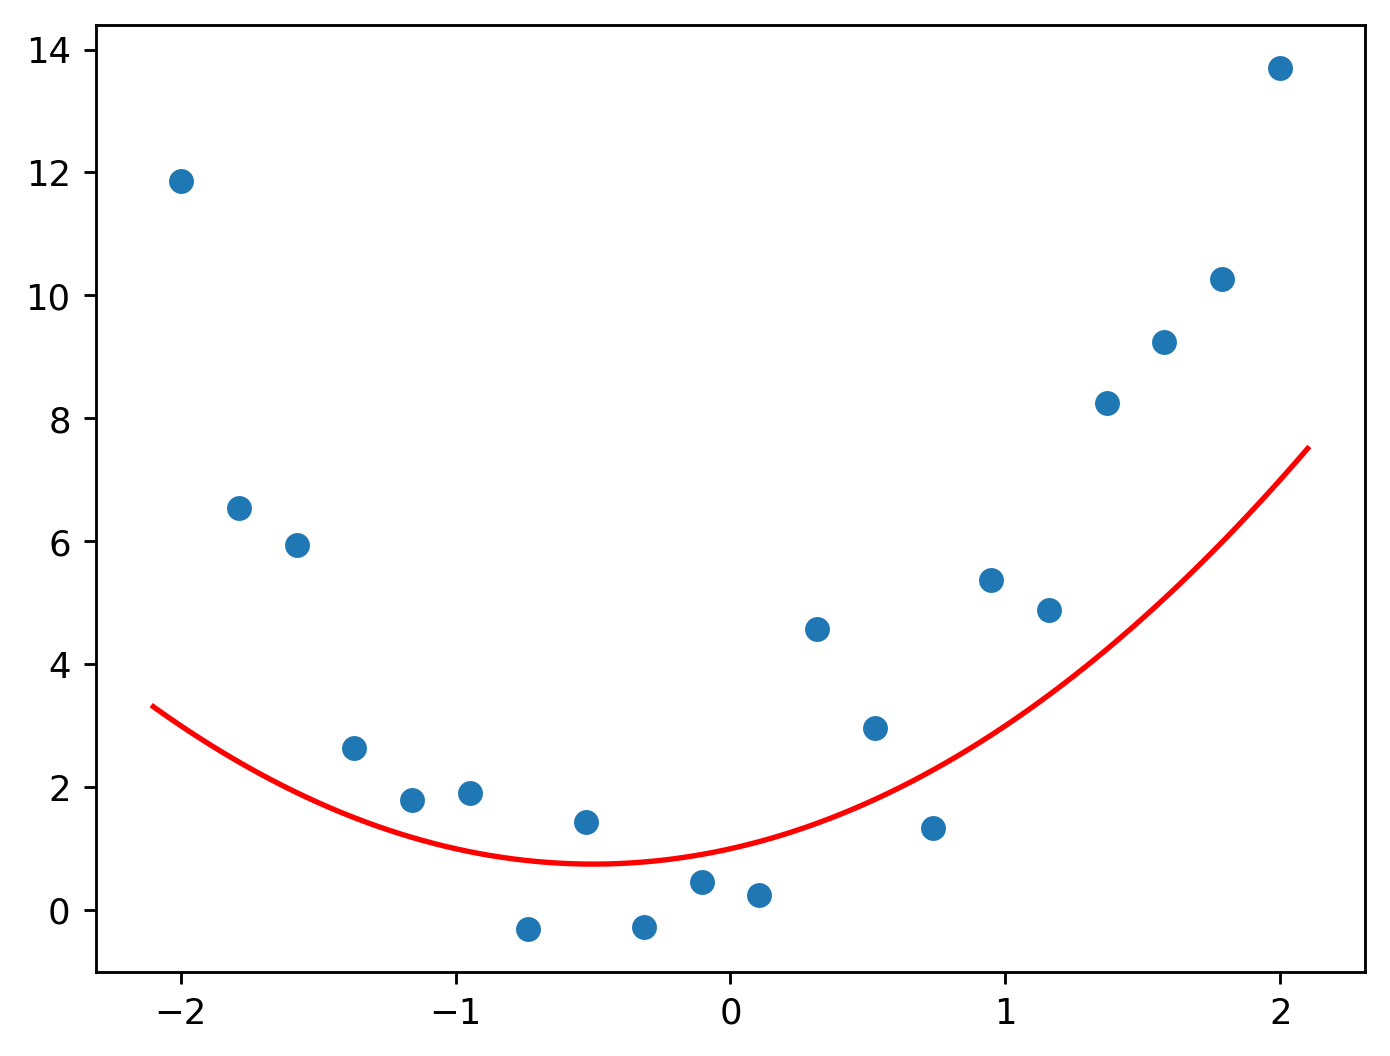

In [8]:
plt.scatter(x, y)
plot_function(make_quadratic(1, 1, 1))

Hmm, not a very good fit.

Let's try another set of values for the parameters: $2$, $1$, $1.5$.

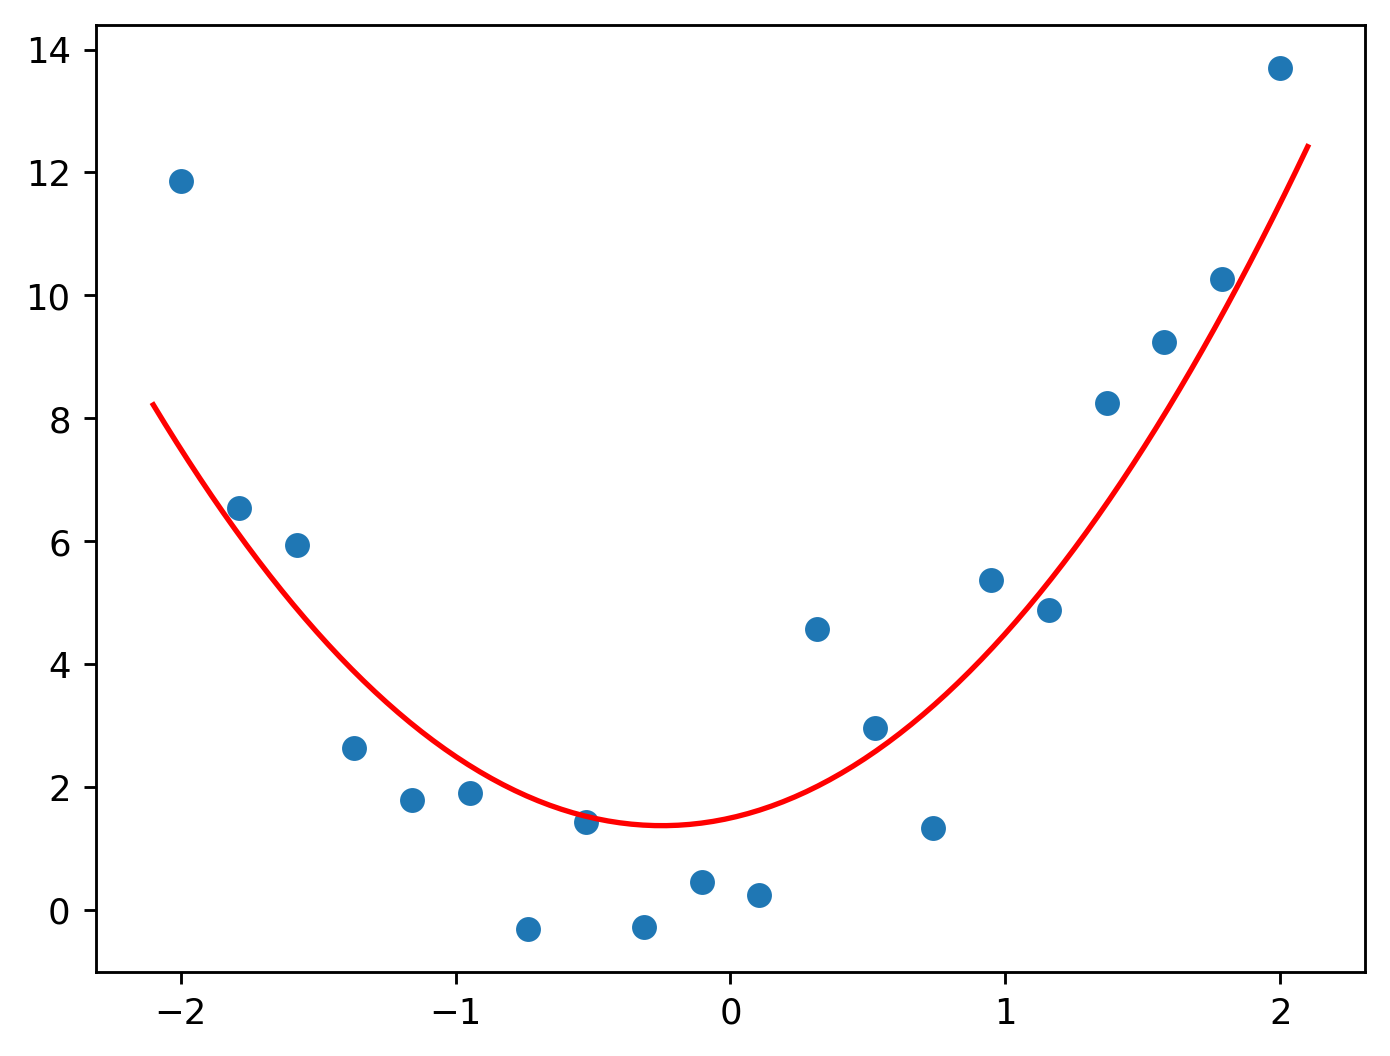

In [9]:
plt.scatter(x, y)
plot_function(make_quadratic(2, 1, 1.5))

Looking much better now!

Let's see what $2$, $0$, and $1.5$ gives us.

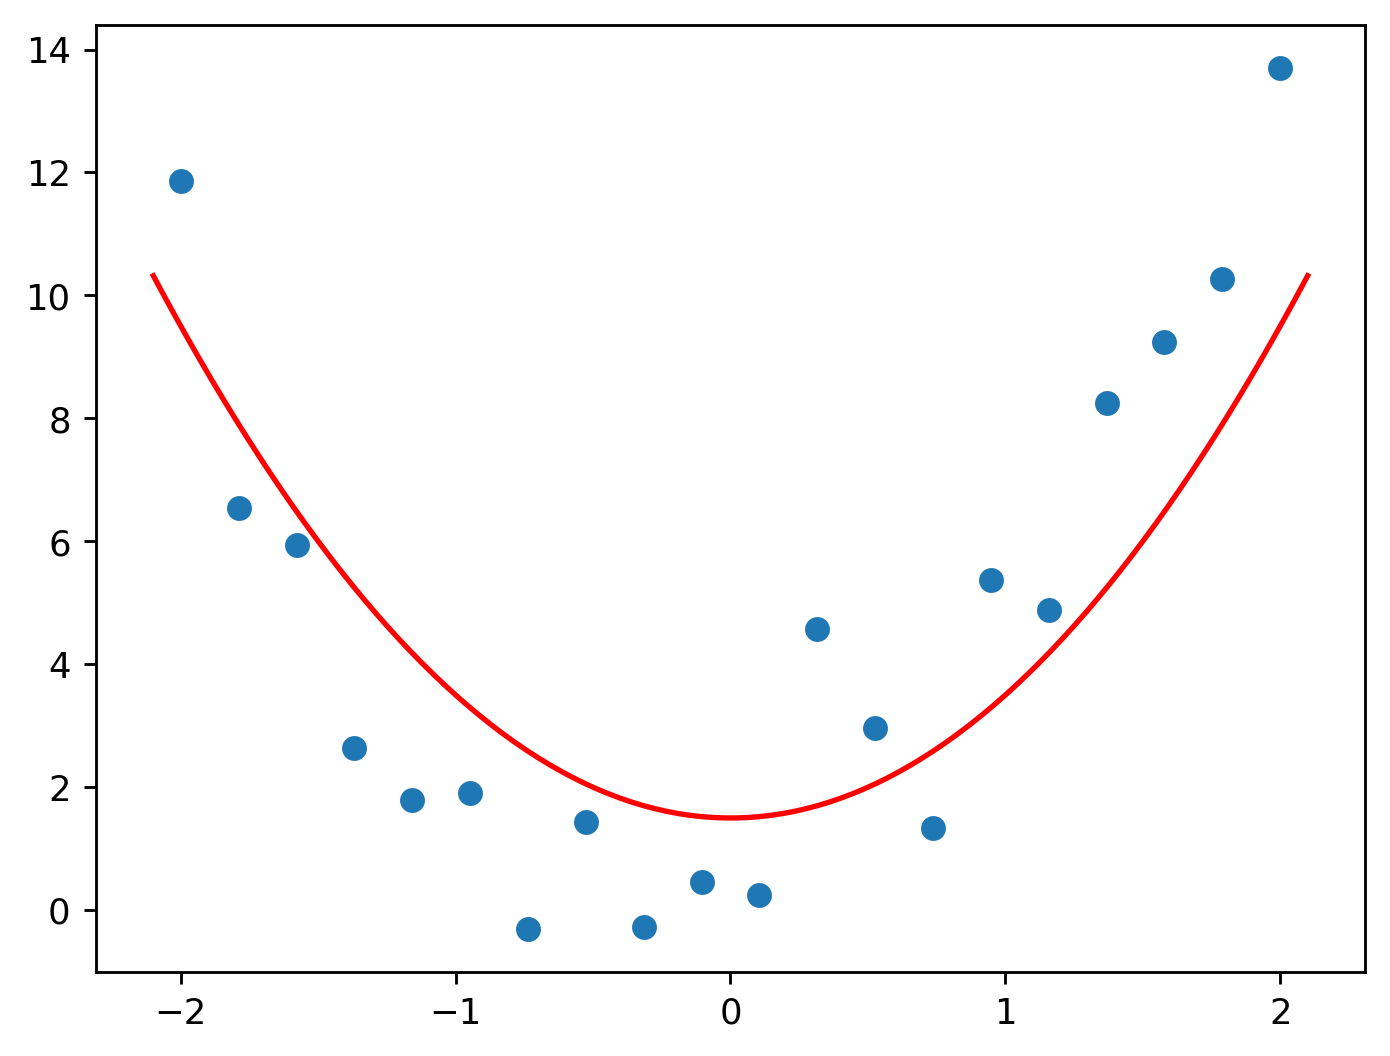

In [10]:
plt.scatter(x, y)
plot_function(make_quadratic(2, 0, 1.5))

Eyeballing this is difficult. A certain set of parameters we use may be good by looking at the resulting graph, but in reality, it may not be.

What we need is something that can tell us how good our function is; something that tells us whether the changes we are making are actually good or not. To do this, we can calculate a number called the **loss**. The smaller the loss, the better the function is.

There are many different ways loss can be calculated. The way we will be doing it is known as **mean absolute error (MAE)**. In simple terms, it tells us how far off each prediction is from the actual value. For example, if we have a MAE of 1, this means that, on average, each prediction we make is 1 unit off from the real value.

In our case, a MAE of 1 would mean that each prediction is on average 1 m/s off from the real value.

Let's repeat what we did above, but this time, we'll also see what the MAE is.

In [11]:
def mae(predictions, actual):
    return torch.absolute(predictions-actual).mean()

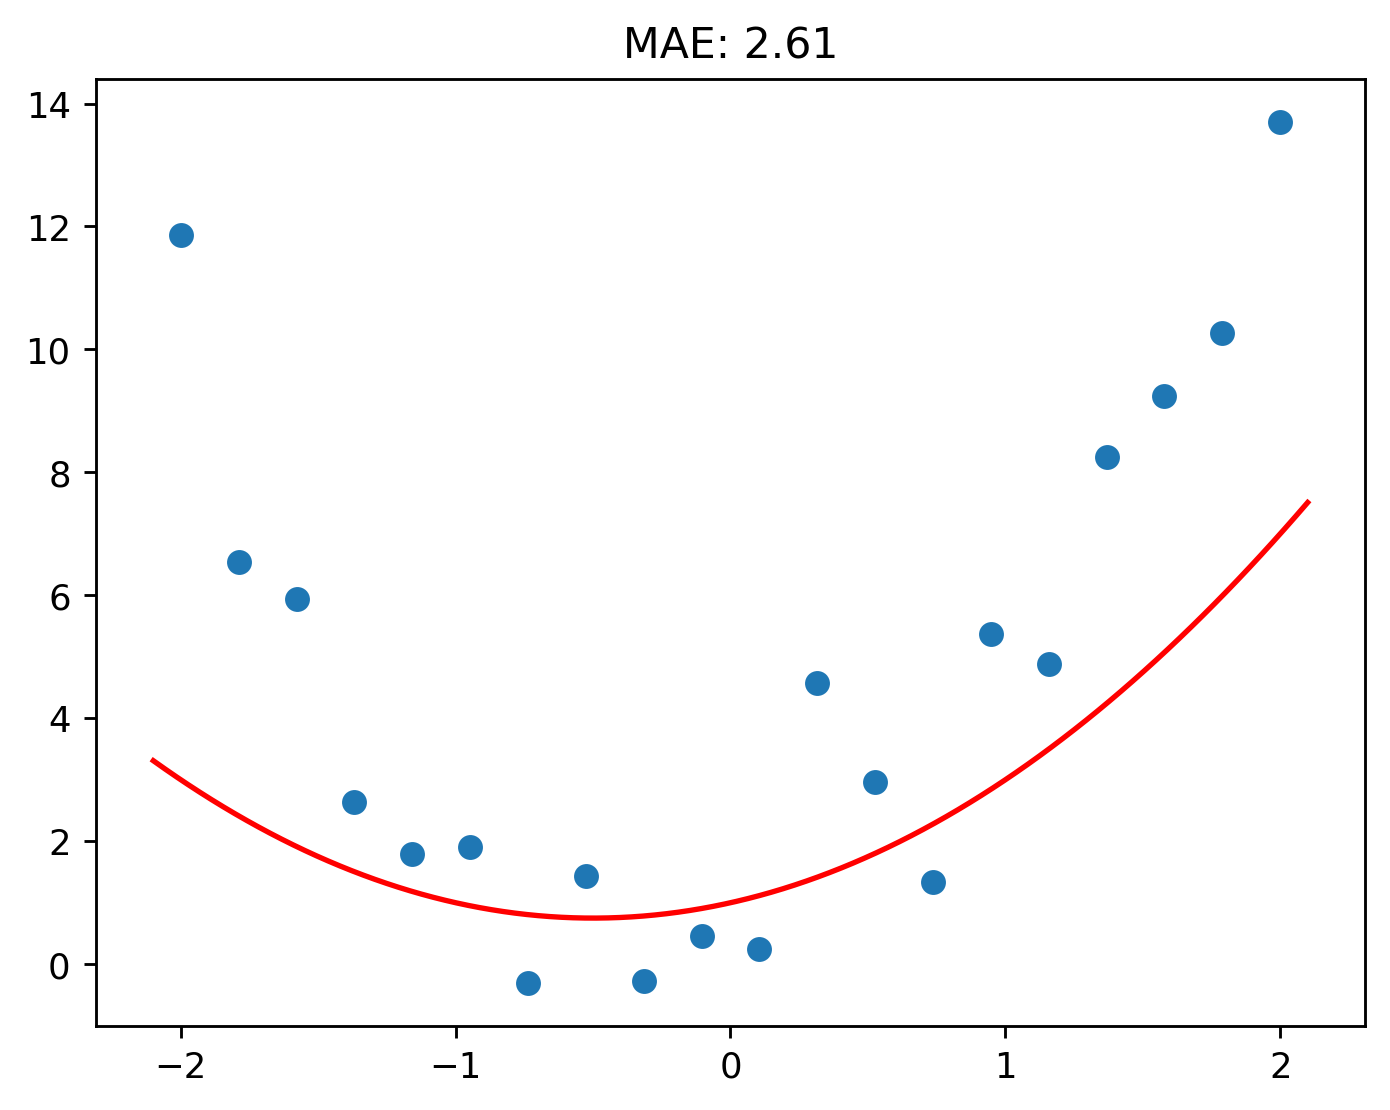

In [12]:
plt.scatter(x, y)
f = make_quadratic(1, 1, 1)
plot_function(f, title=f"MAE: {mae(f(x), y):.2f}")

Again, this means that on average, each prediction we will make is 2.61 m/s off from the real value.

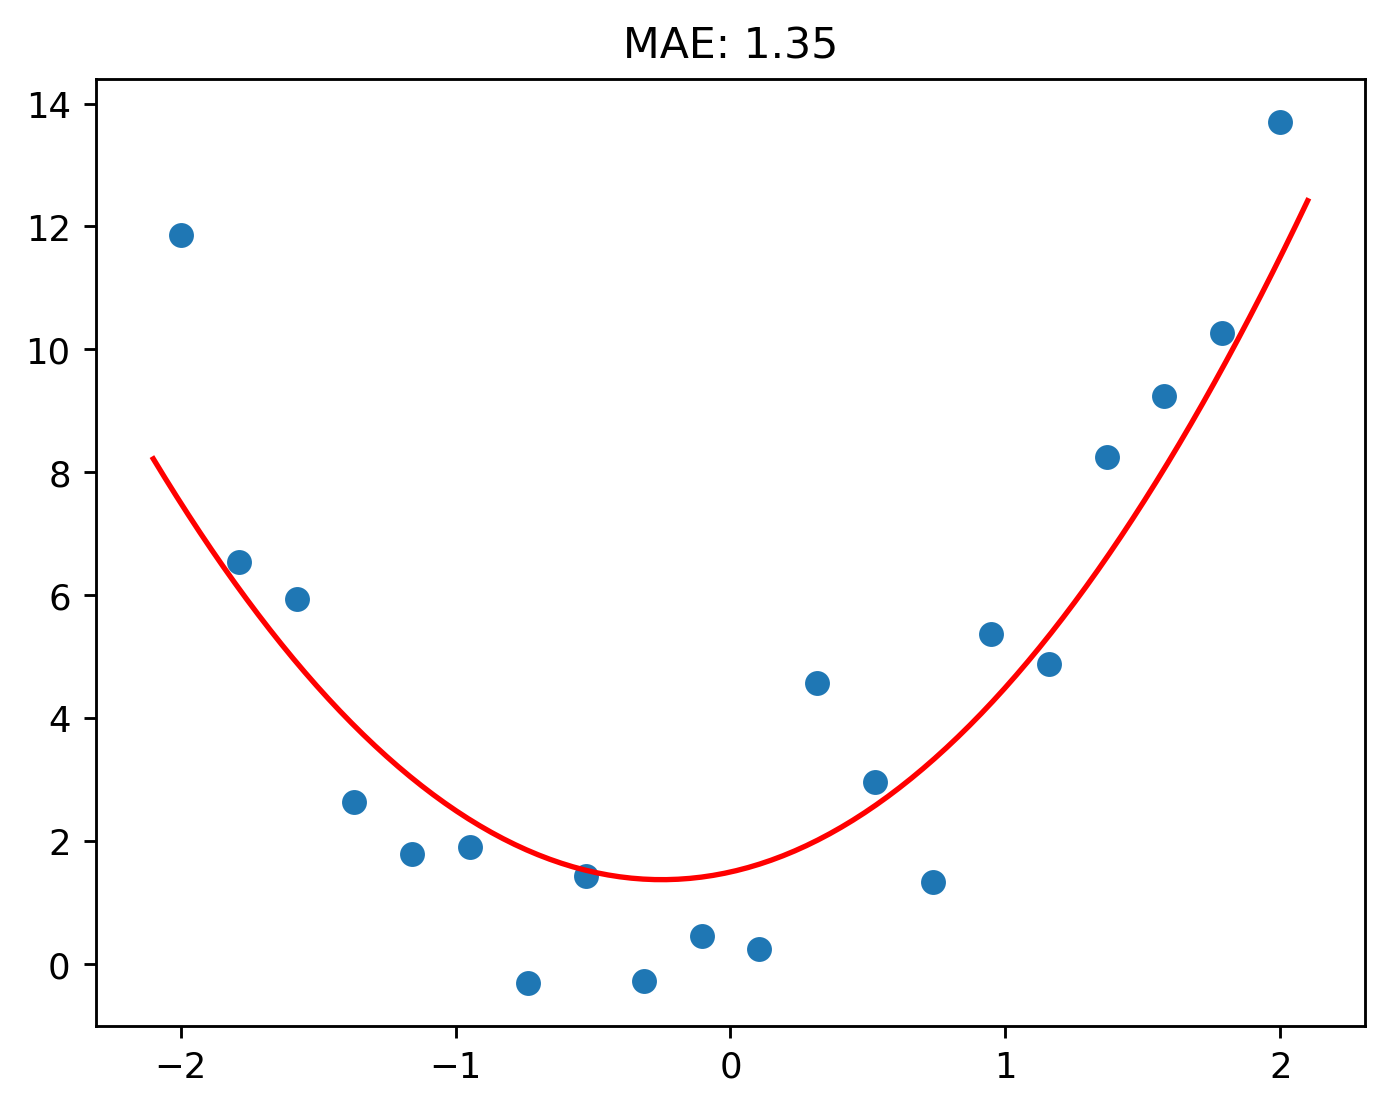

In [13]:
plt.scatter(x, y)
f = make_quadratic(2, 1, 1.5)
plot_function(f, title=f"MAE: {mae(f(x), y):.2f}")

That's a big jump!

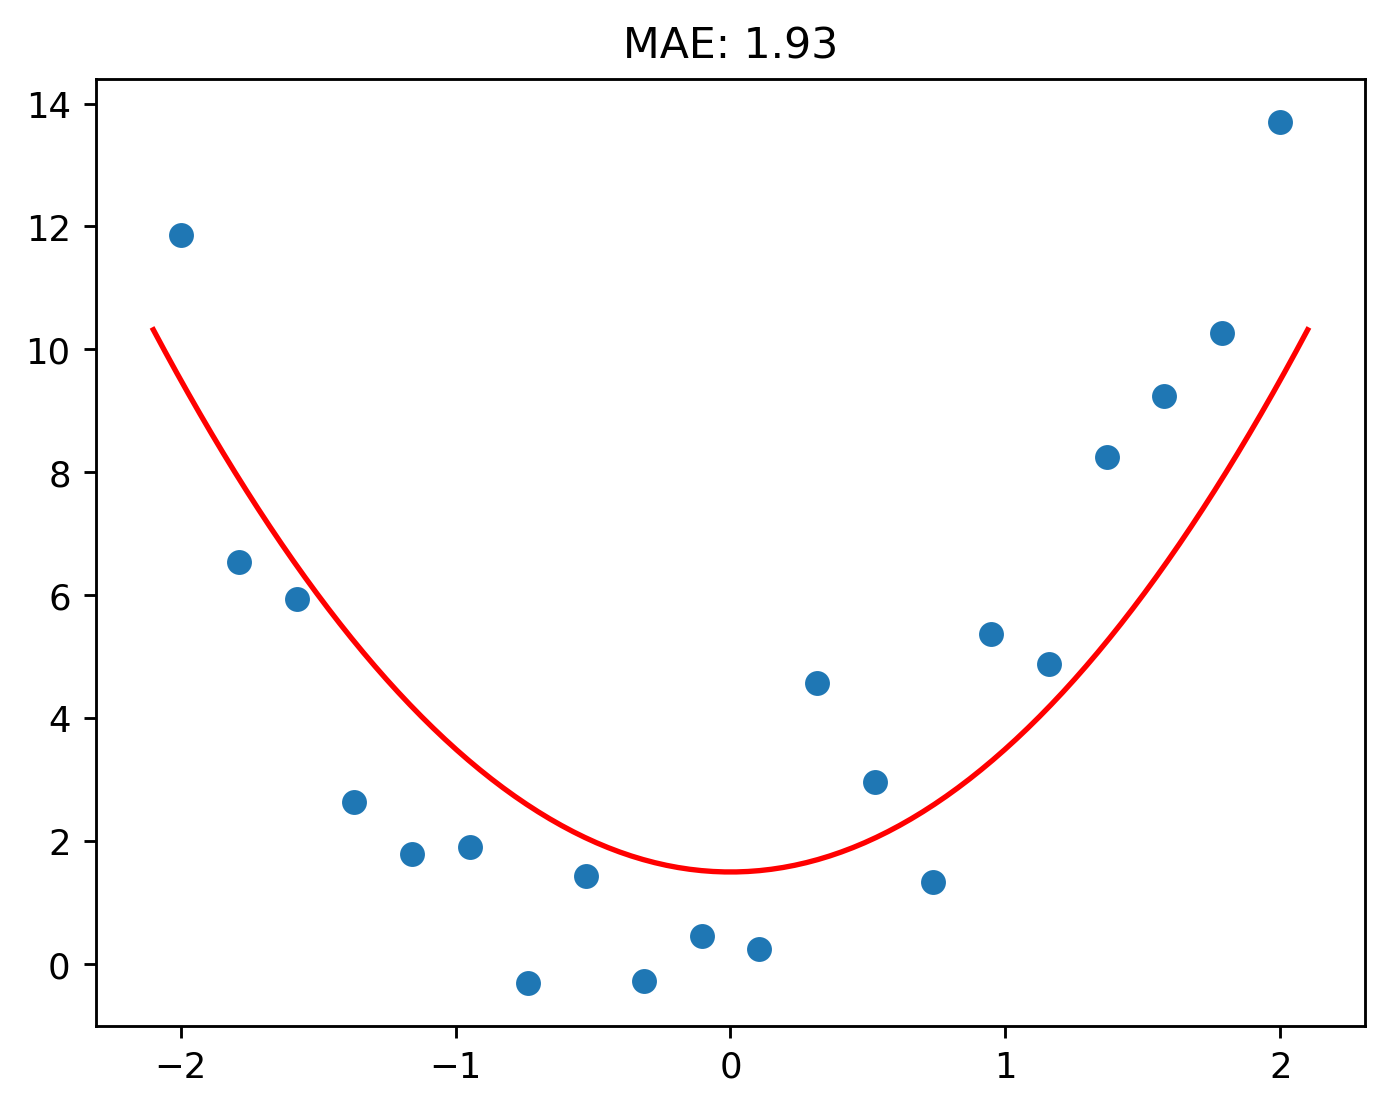

In [14]:
plt.scatter(x, y)
f = make_quadratic(2, 0, 1.5)
plot_function(f, title=f"MAE: {mae(f(x), y):.2f}")

Hmm, things got worse.

Doing this process by hand is very tedious. How do we know if the new set of parameters we are using would improve the function? There needs to be a way to automate this so we don't have to sit down and do this by hand.

What we can do is update the parameters based on the loss. This would in turn create new parameters that would decrease the loss.

:::{.grid}

:::{.g-col-4}
:::

:::{.g-col-4}
```{mermaid}
%%| fig-width: 2.2
flowchart TB
    A[Loss] -- Updates ---> B[Parameters] -- Updates ---> A
```
:::

:::{.g-col-4}
:::

:::

Let's give $a$, $b$, and $c$ an arbitrary set of parameters $1.1$, $1.1$, and $1.1$.

In [15]:
parameters = torch.tensor([1.1, 1.1, 1.1]).requires_grad_()

Now let's create a quadratic with this set of parameters and calculate its mean absolute error.

In [16]:
f = make_quadratic(*parameters)
loss = mae(f(x), y)
display(Markdown(f"""
:::{{.callout-tip appearance="default" icon=false}}
# Code Output
The MAE is {loss:.2f}.
:::
"""))


:::{.callout-tip appearance="default" icon=false}
# Code Output
The MAE is 2.42.
:::


Now comes the next step: how do we update the parameters based on this loss we have calculated?

To do this, we calculate a new set of quantities known as the gradients. Each parameter has its own gradient.

Let's say $a$ has the value of $1$. If $a$ has a gradient of value $0.5$, this would mean that if we increase $a$ by $1$, the loss would increase by $0.5$.
Therefore, if we *decrease* $a$ by $1$, this would mean the loss would decrease by $0.5$, which is what we want!

Read over this once more and it'll make sense!

Let's quickly go over the inverse: if $a$ has a gradient of value $-0.5$, increasing $a$ by $1$ would decrease the loss by $0.5$ — again, this is what we want! Similarly, decreasing $a$ by $1$ would increase the loss by $0.5$.

The gradients are calculated from the loss. Then the gradients, the current parameters, and along with another value, the parameters are updated to new values. The "another value" is known as the **learning rate**. The learning rate controls how much the gradients update the parameters.

:::{.grid}

:::{.g-col-2}
:::


:::{.g-col-8}
```{mermaid}
%%| fig-width: 5
flowchart TB
    A[Gradients]
    B[Current Parameters]
    C[Learning Rate]
    D[Magical Box]
    E[Updated Paramters]
    A & B & C ---> D ---> E
```
:::

:::{.g-col-2}
:::

:::

Lets see this tangibly.

In [17]:
loss.backward()
display(Markdown(f"""
:::{{.callout-tip appearance="default" icon=false}}
# Code Output
The gradients for each parameter respectively are {[round(gradient, 2) for gradient in parameters.grad.tolist()]}.
:::
"""))


:::{.callout-tip appearance="default" icon=false}
# Code Output
The gradients for each parameter respectively are [-1.35, -0.03, -0.5].
:::


Okay, let's break this down. The gradient for the first parameter $a$ is $-1.35$. This tells us that if we increase the parameter $a$ by $1$, our loss will decrease by $-1.35$. Similary, if we increase the parameter $b$ by $1$, this will result in the loss being decreased by $-0.03$. The same logic holds for $c$.

Let's now update the parameters. Remember, the current set of parameters, their gradients, and the learning rate all update the current set of parameters to
new values.

In [18]:
with torch.no_grad():
    parameters -= parameters.grad * 0.01

display(Markdown(f"""
:::{{.callout-tip appearance="default" icon=false}}
# Code Output
The new parameters are {[round(parameter, 2) for parameter in parameters.tolist
()]}.
:::
"""))


:::{.callout-tip appearance="default" icon=false}
# Code Output
The new parameters are [1.11, 1.1, 1.11].
:::


We can now repeat the process as many times as desired. Let's do it 4 times.

Pass: 0; Loss: 2.4010409560416095
Pass: 1; Loss: 1.9847692009423128
Pass: 2; Loss: 1.498316818239171
Pass: 3; Loss: 1.171195547258246



:::{.callout-tip appearance="default" icon=false}
# Code Output
The MAE after 4 passes is 1.17.
:::


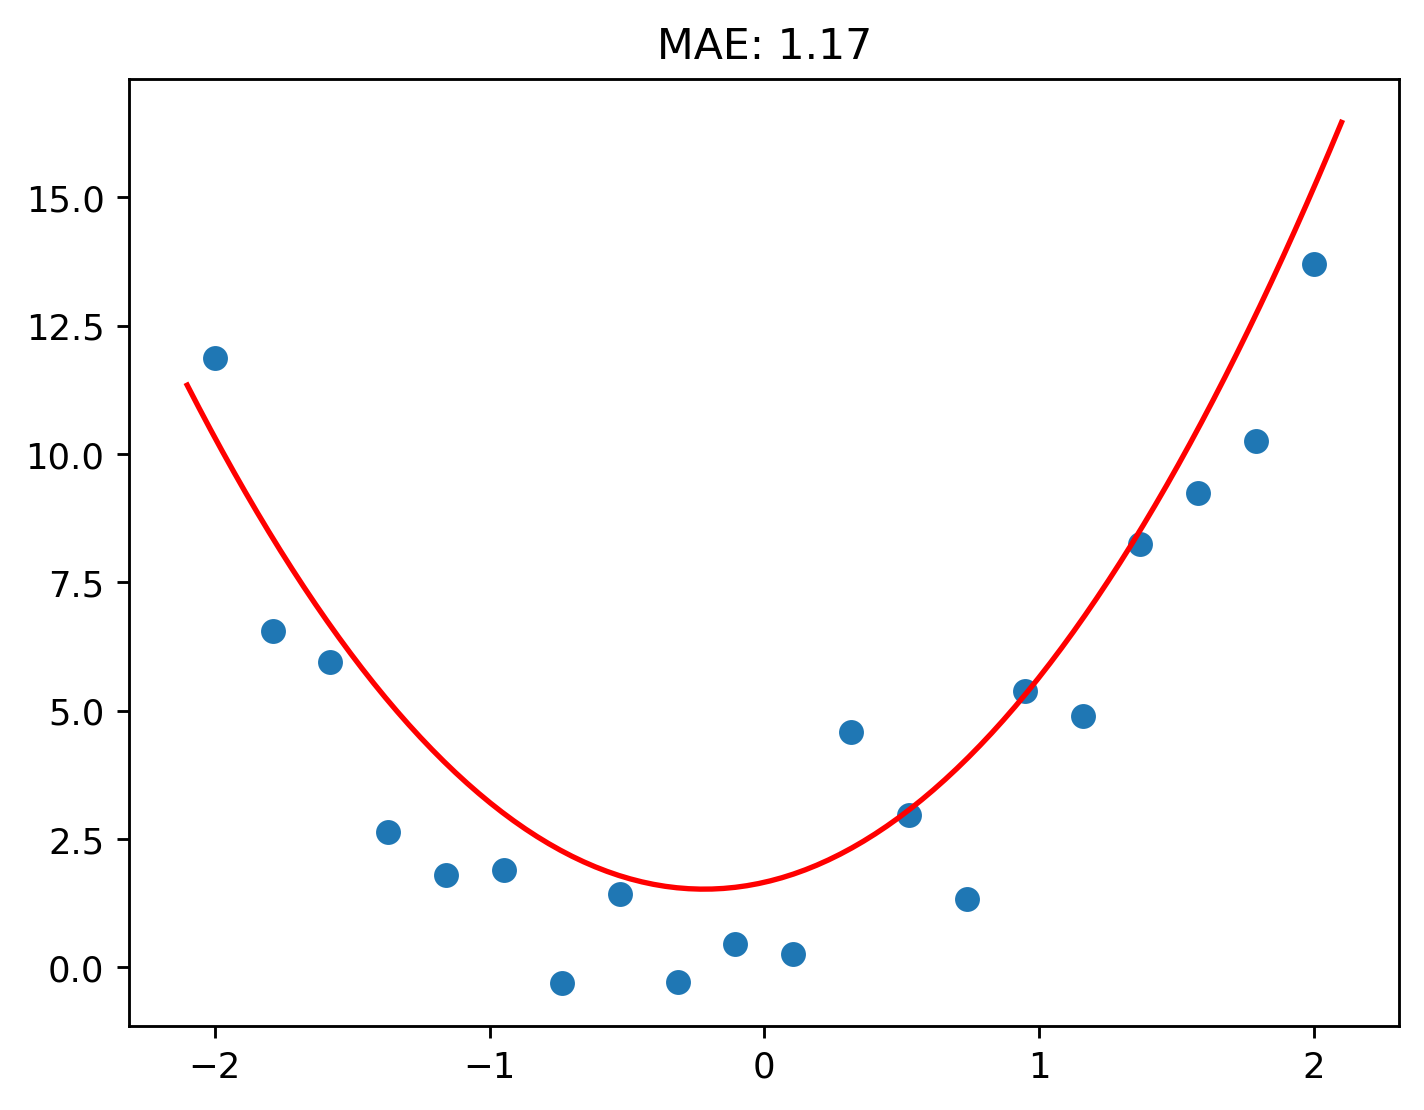

In [19]:
display(Markdown(f"""
:::{{.callout-tip appearance="default" icon=false}}
# Code Output
The MAE after 4 passes is {train(make_quadratic, parameters, 4, learning_rate=0.1, print_output=True):.2f}.
:::
"""))

And there you go! An even better fitting quadratic!

Let's see what the object's speed is at 1 second.

In [20]:
f = make_quadratic(*parameters)
display(Markdown(f"""
:::{{.callout-tip appearance="default" icon=false}}
# Code Output
The object's velocity at 1 seconds is {f(1):.2f} m/s.
:::
"""))


:::{.callout-tip appearance="default" icon=false}
# Code Output
The object's velocity at 1 seconds is 5.65 m/s.
:::


That roughly seems right!

Let's see what the object's speed would be at 3 seconds.

In [21]:
f = make_quadratic(*parameters)
display(Markdown(f"""
:::{{.callout-tip appearance="default" icon=false}}
# Code Output
The object's velocity at 1 seconds is {f(3):.2f} m/s.
:::
"""))


:::{.callout-tip appearance="default" icon=false}
# Code Output
The object's velocity at 1 seconds is 30.31 m/s.
:::


And now, the diagram below should make sense!

:::{.grid}

:::{.g-col-2}
:::


:::{.g-col-8}
```{mermaid}
%%| fig-width: 3.5
flowchart TB
    B[Calculate Loss] --> C[Calculate Gradients] --> D[Update Parameters] --> B
```
:::

:::{.g-col-2}
:::

:::


## The Cool Case: ReLUs

The quadratic example above is a nice, simple way to get a grasp of things. However, you may be wondering, "What if the data doesn't follow a quadratic shape? What do we do then?"

And that's a good question! What if our data doesn't follow any sort of mathematical shape? What if we don't even know the shape the data will follow? How do
 we know what function to use in that case?

There is a solution to that! There is an easy way to create a function that bends and twists itself to fit the data; an "unbound" function of sorts, as I like to call it.

This can be achieved by using another equation known as the **ReLU**. Another fancy word that can make you sound like a professional, while also being really simple. ReLU is short for **Rectified Linear Unit**.

The ReLU takes any value that is less than 0, and converts to 0.

Let's see this.

Take the following line. It has both positive and negative values on the vertical axis.

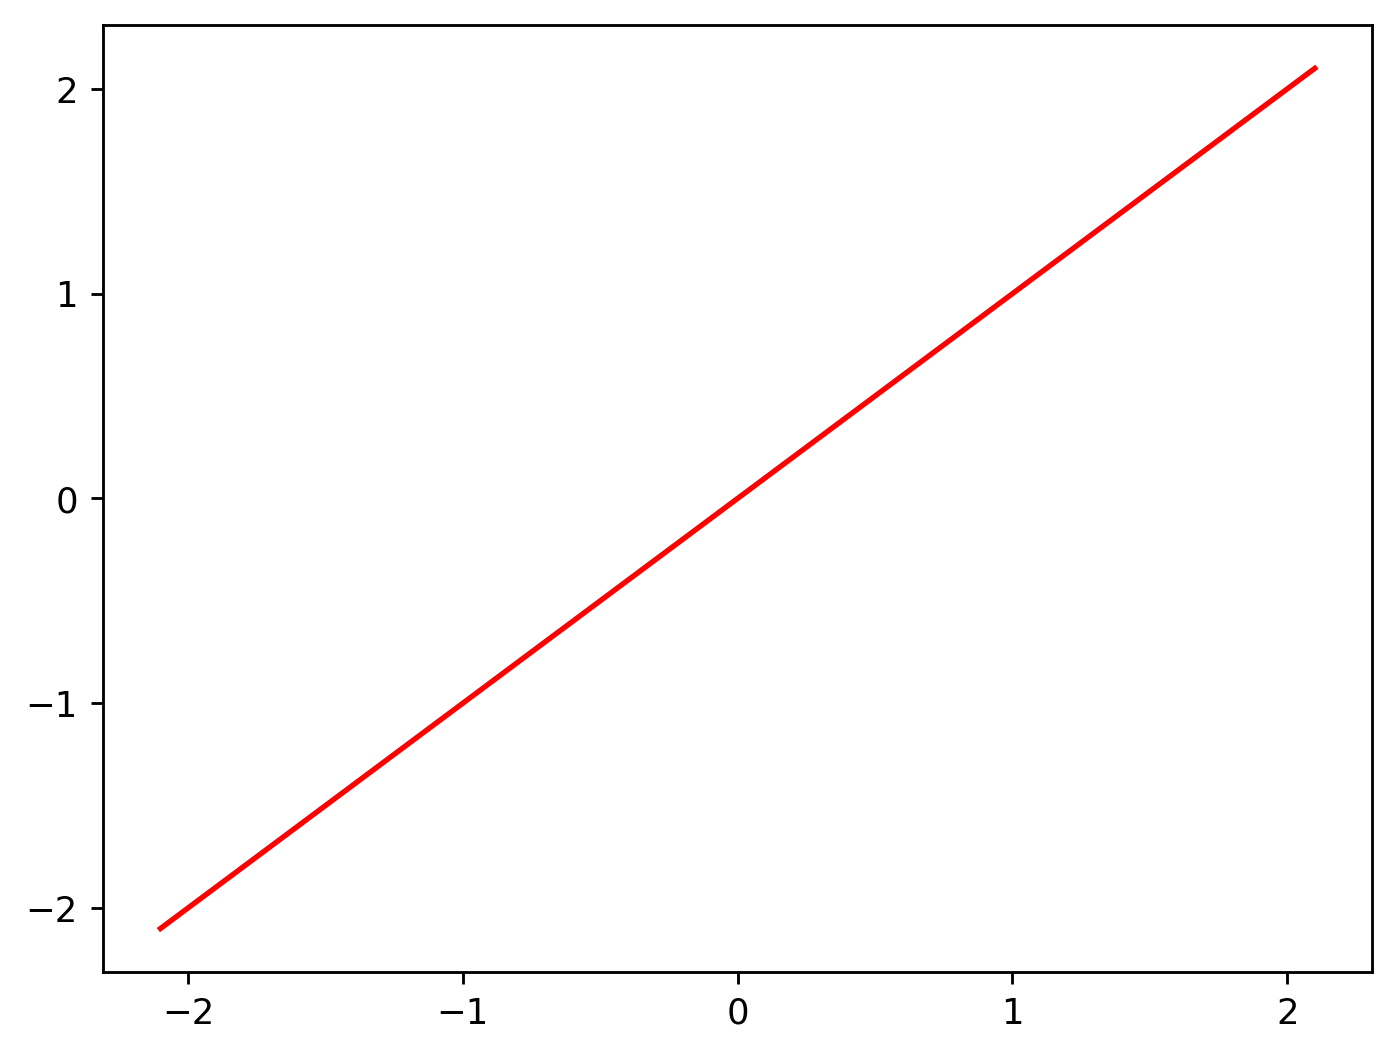

In [22]:
plot_function(lambda x: x)

When we use a ReLU, all negative values are converted to zero.

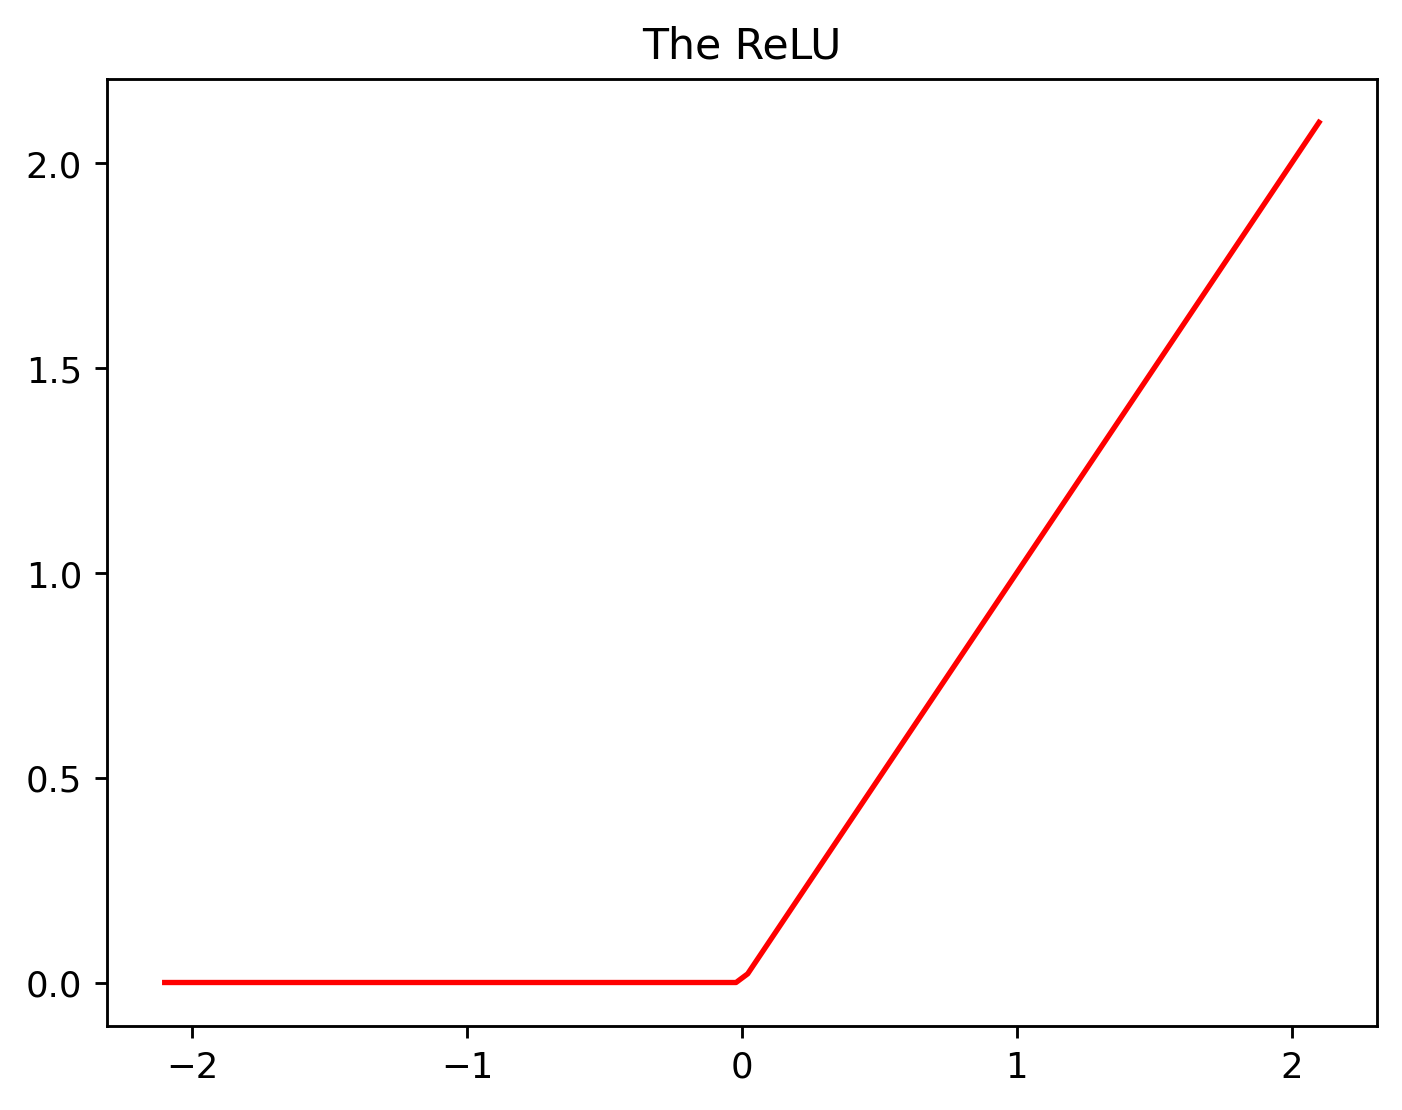

In [23]:
def relu(input):
    return F.relu(input)

plot_function(relu, title='The ReLU')

Let's return to our original data.

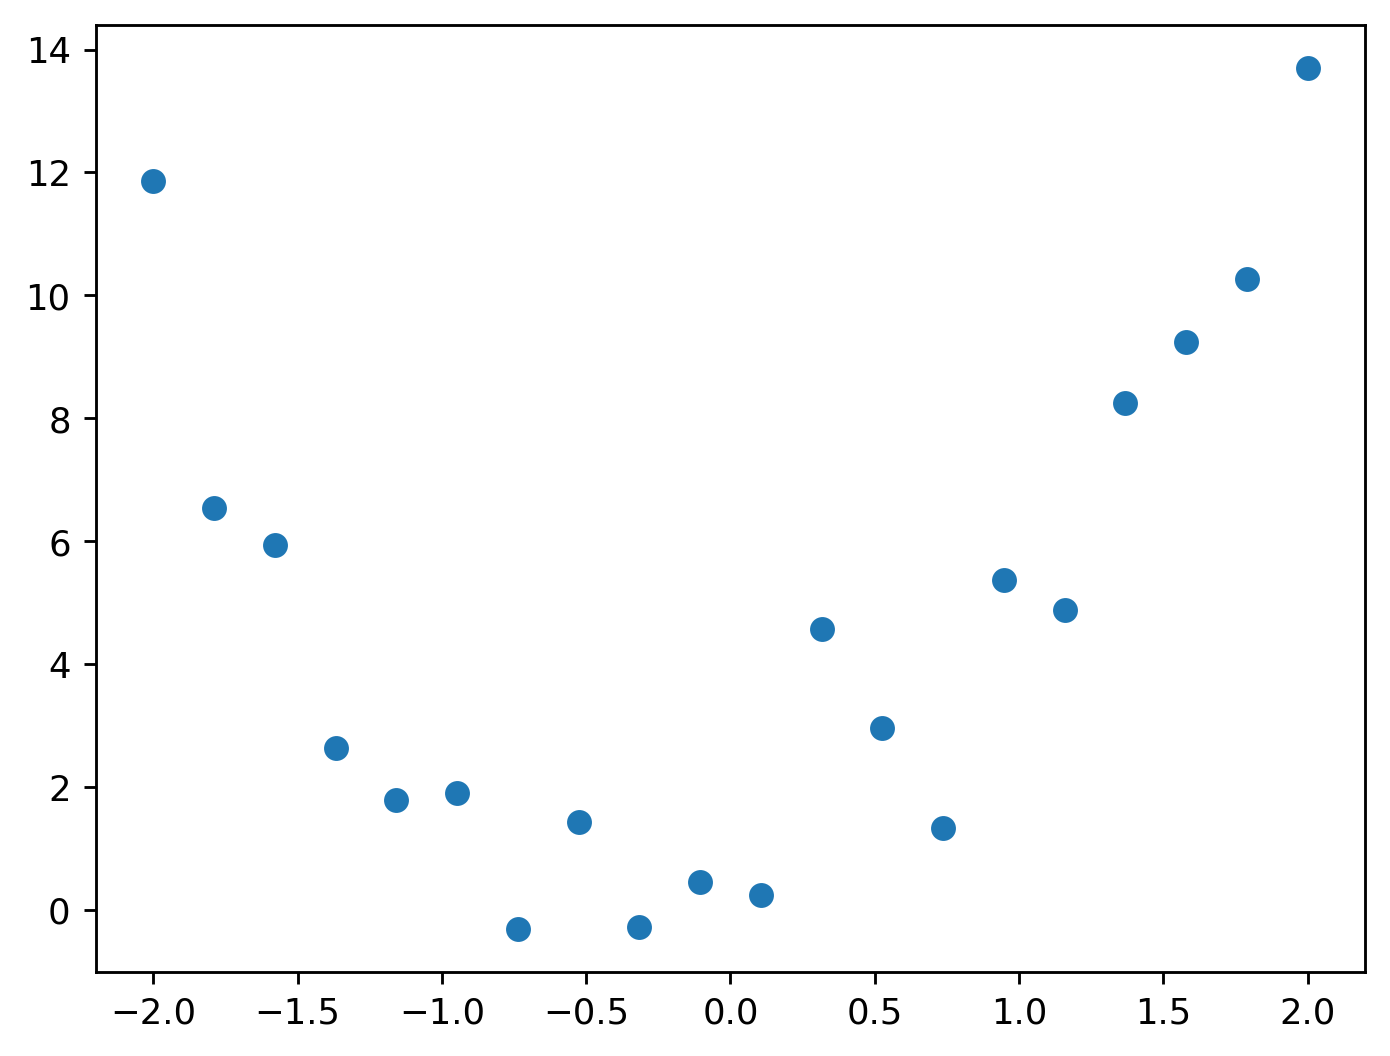

In [24]:
plt.scatter(x, y);

Now a single ReLU won't work as seen below.

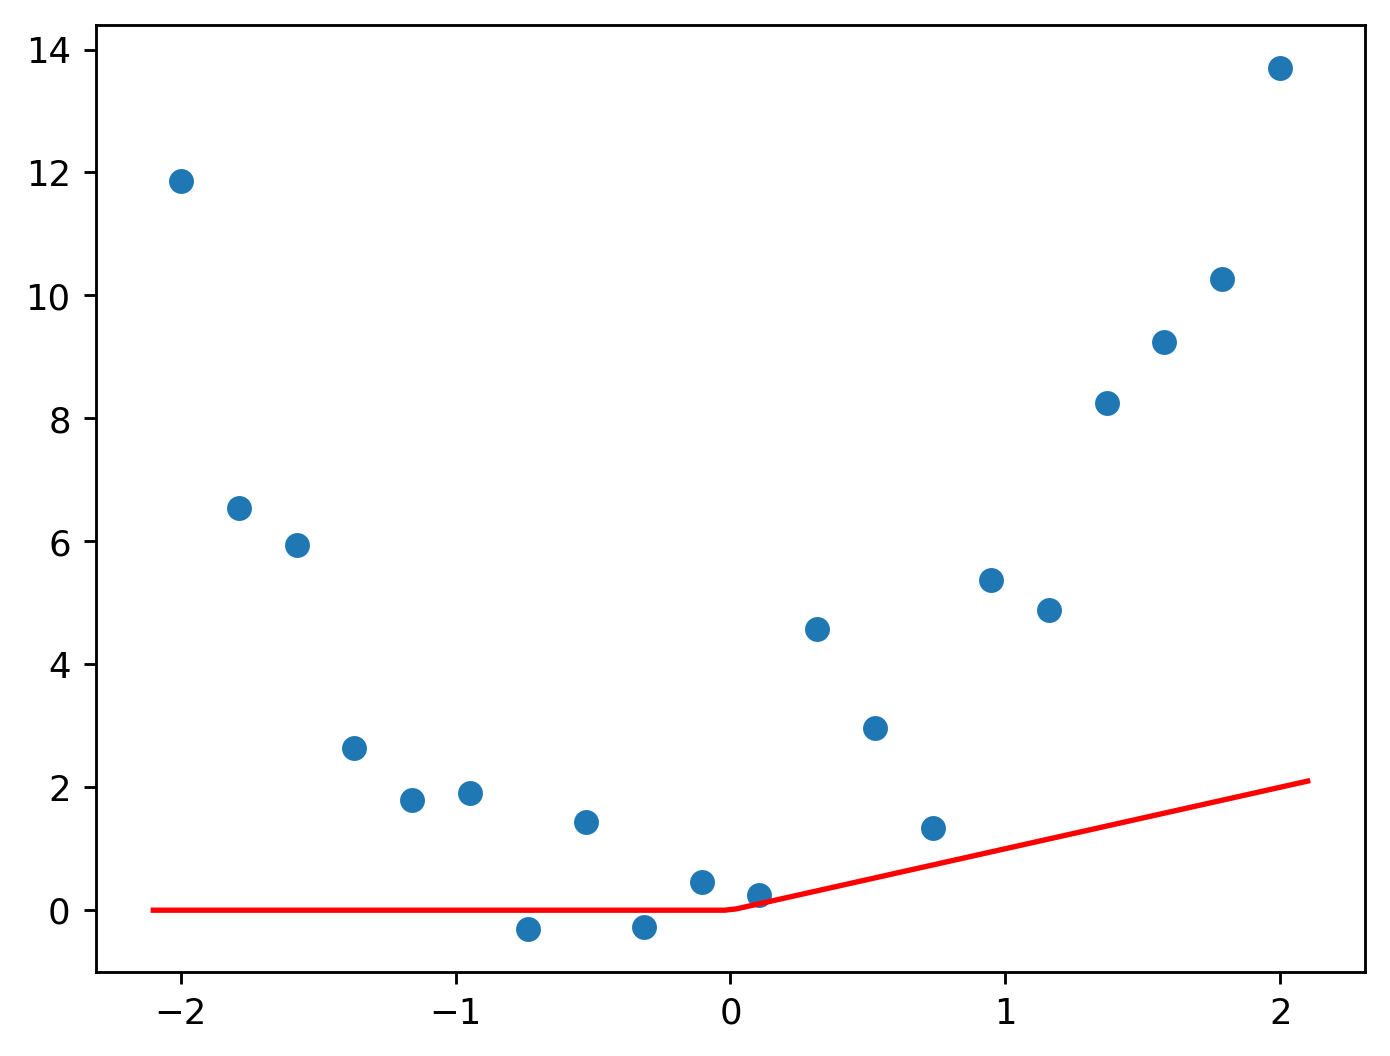

In [25]:
plt.scatter(x, y)
plot_function(relu)

Even after we try to fit it.

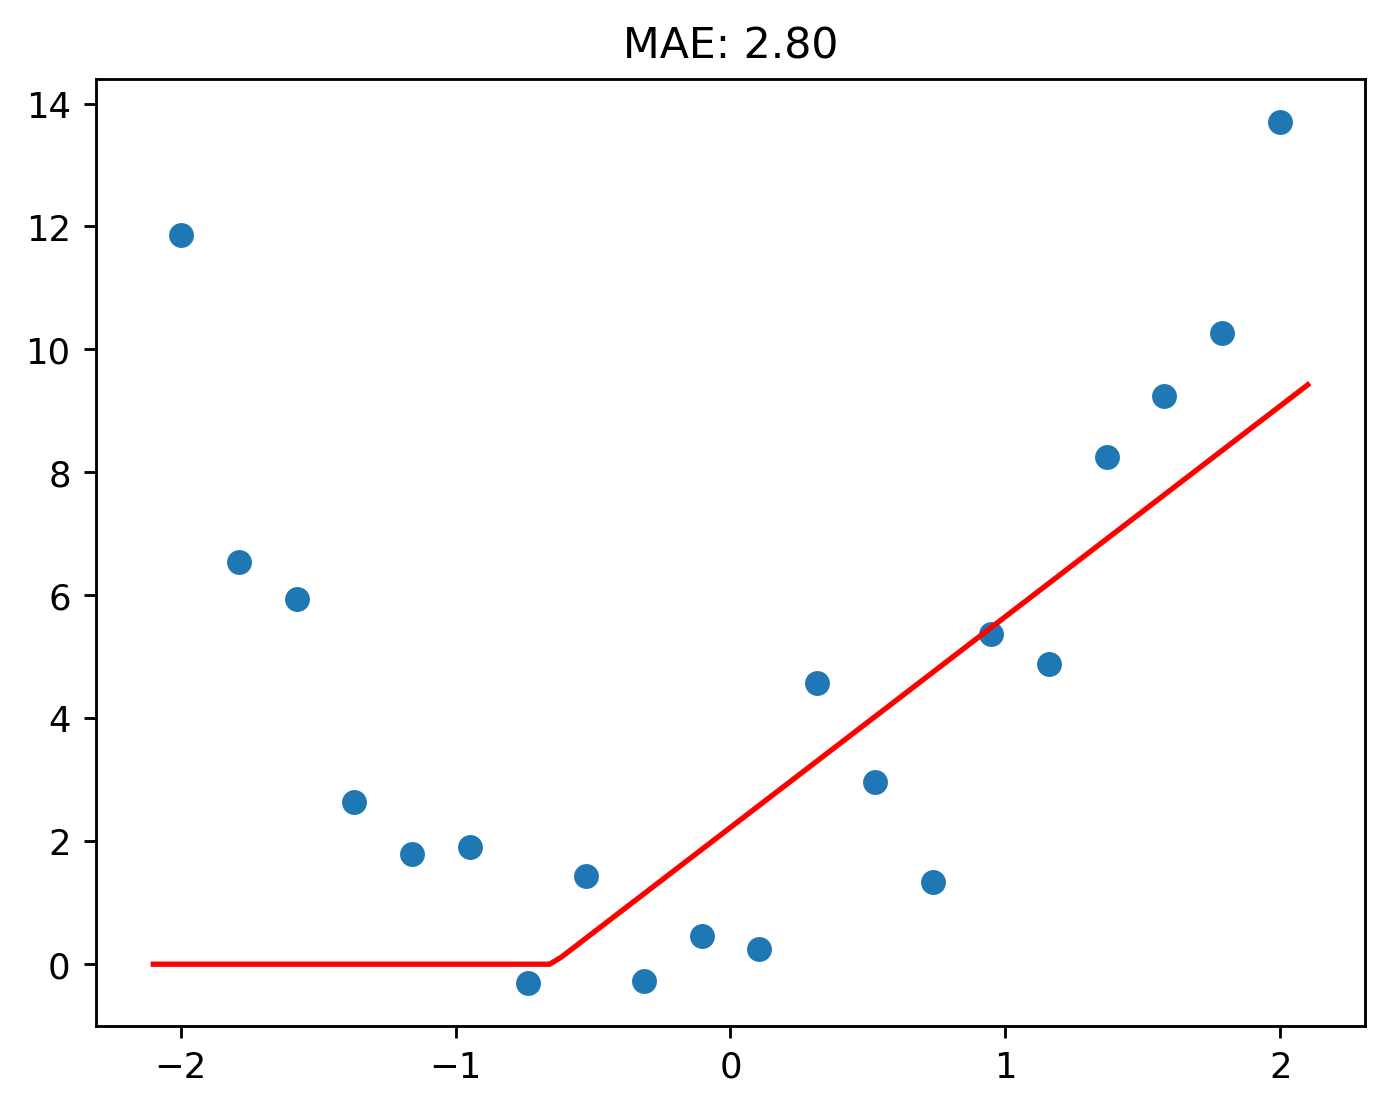

In [26]:
def relu(m, c, data):
    return F.relu(m*data + c)

def make_relu(m, c):
    return partial(relu, m, c)

parameters = torch.tensor([1, 1]).float().requires_grad_()

train(make_relu, parameters, 10, 0.1, False);



But look at what happens when two ReLUs are, literally, added together!

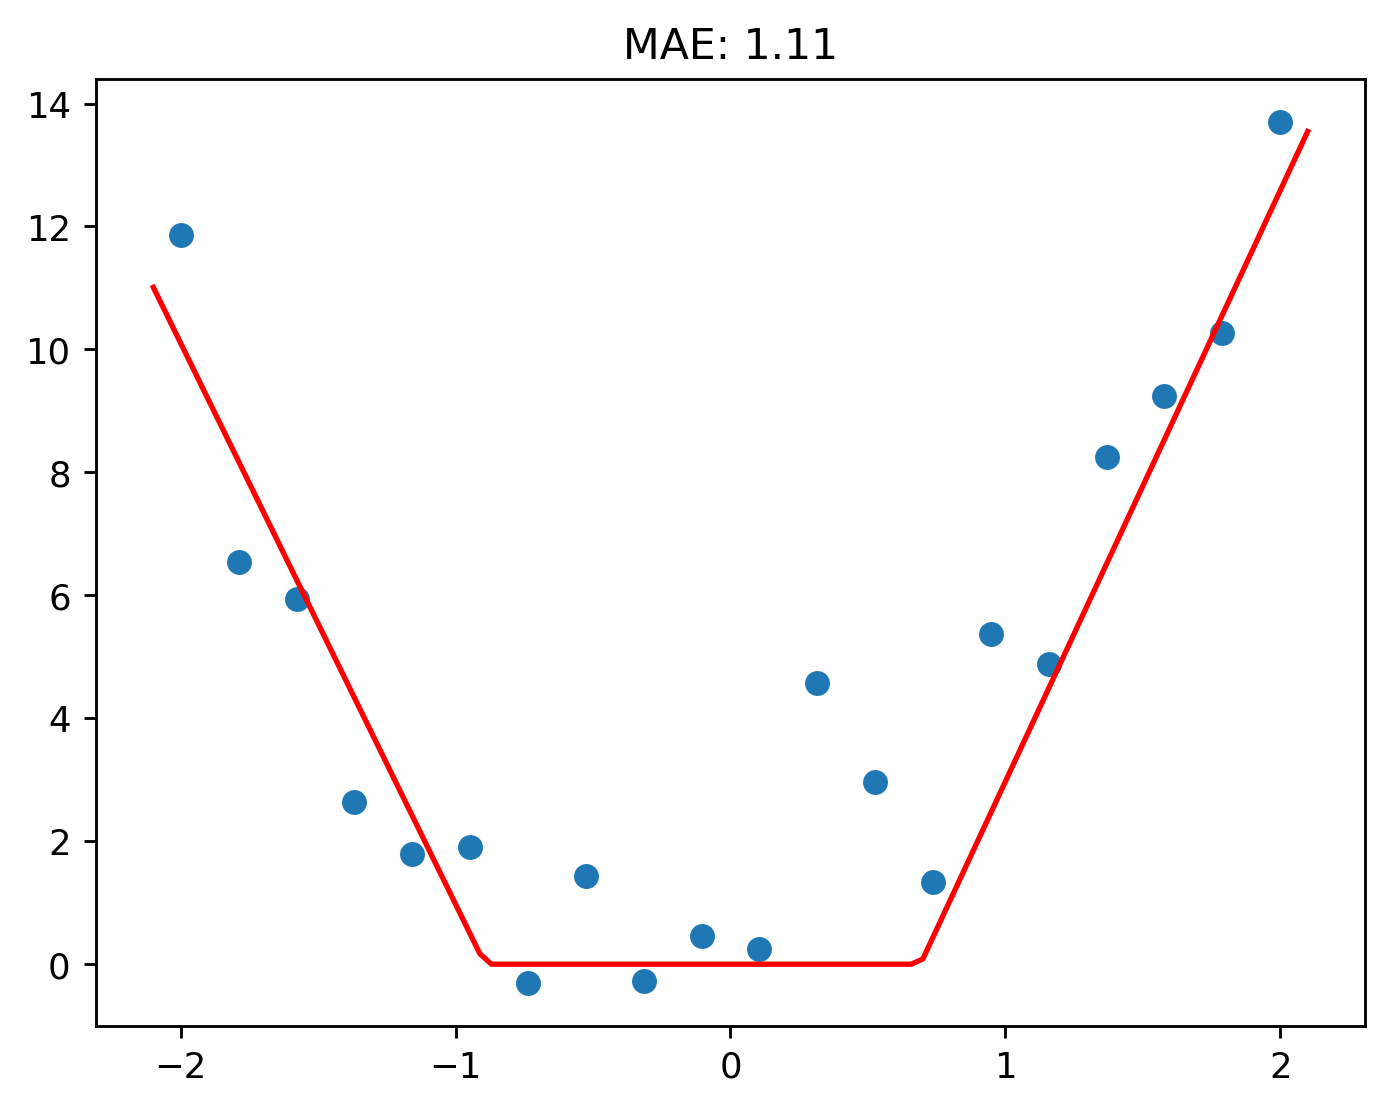

In [27]:
def double_relu(m1, c1, m2, c2, x):
    return relu(m1, c1, x) + relu(m2, c2, x)

def make_double_relu(m1, c1, m2, c2):
    return partial(double_relu, m1, c1, m2, c2)

torch.manual_seed(16)
parameters = torch.rand(4).requires_grad_()
train(make_double_relu, parameters, 20, 0.5, False);

In [28]:
#| output: false
losses = []
for seed in range(50):
    torch.manual_seed(seed)
    parameters = torch.rand(4).requires_grad_()
    losses.append(train(make_double_relu, parameters, 62, 0.05, False, False))
losses = torch.stack(losses)
print(f"The seed {(losses == torch.min(losses)).nonzero().item()} obtained the lowest loss of {torch.min(losses)}")

The seed 32 obtained the lowest loss of 1.1413304088791658


<!-- - Seed 22; 196 passes; lr=0.01
- Seed 33; 49 passes; lr=0.1
- Seed 16; 20 passes; lr=0.5 -->

Pretty neat, hey?

Let's add a third ReLU to the mix.

In [29]:
def triple_relu(m1, c1, m2, c2, m3, c3, x):
    return relu(m1, c1, x) + relu(m2, c2, x) + relu(m3, c3, x)

def make_triple_relu(m1, c1, m2, c2, m3, c3):
    return partial(triple_relu, m1, c1, m2, c2, m3, c3)


In [30]:
#| output: false
losses = []
for seed in range(50):
    torch.manual_seed(seed)
    parameters = torch.rand(6).requires_grad_()
    losses.append(train(make_triple_relu, parameters, 196, 0.01, False, False))
losses = torch.stack(losses)
print(f"The seed {(losses == torch.min(losses)).nonzero().item()} obtained the lowest loss of {torch.min(losses)}")


The seed 38 obtained the lowest loss of 1.0837593493901845


<!-- #| output: false
- Seed 16; 35 passes; lr=0.5
- Seed 33: 35 passes; lr=0.1
- Seed 10: 45 passes; lr=0.1
- Seed 33; 50 passes; lr=0.05
- Seed 38, 196 passes; lr=0.01 -->

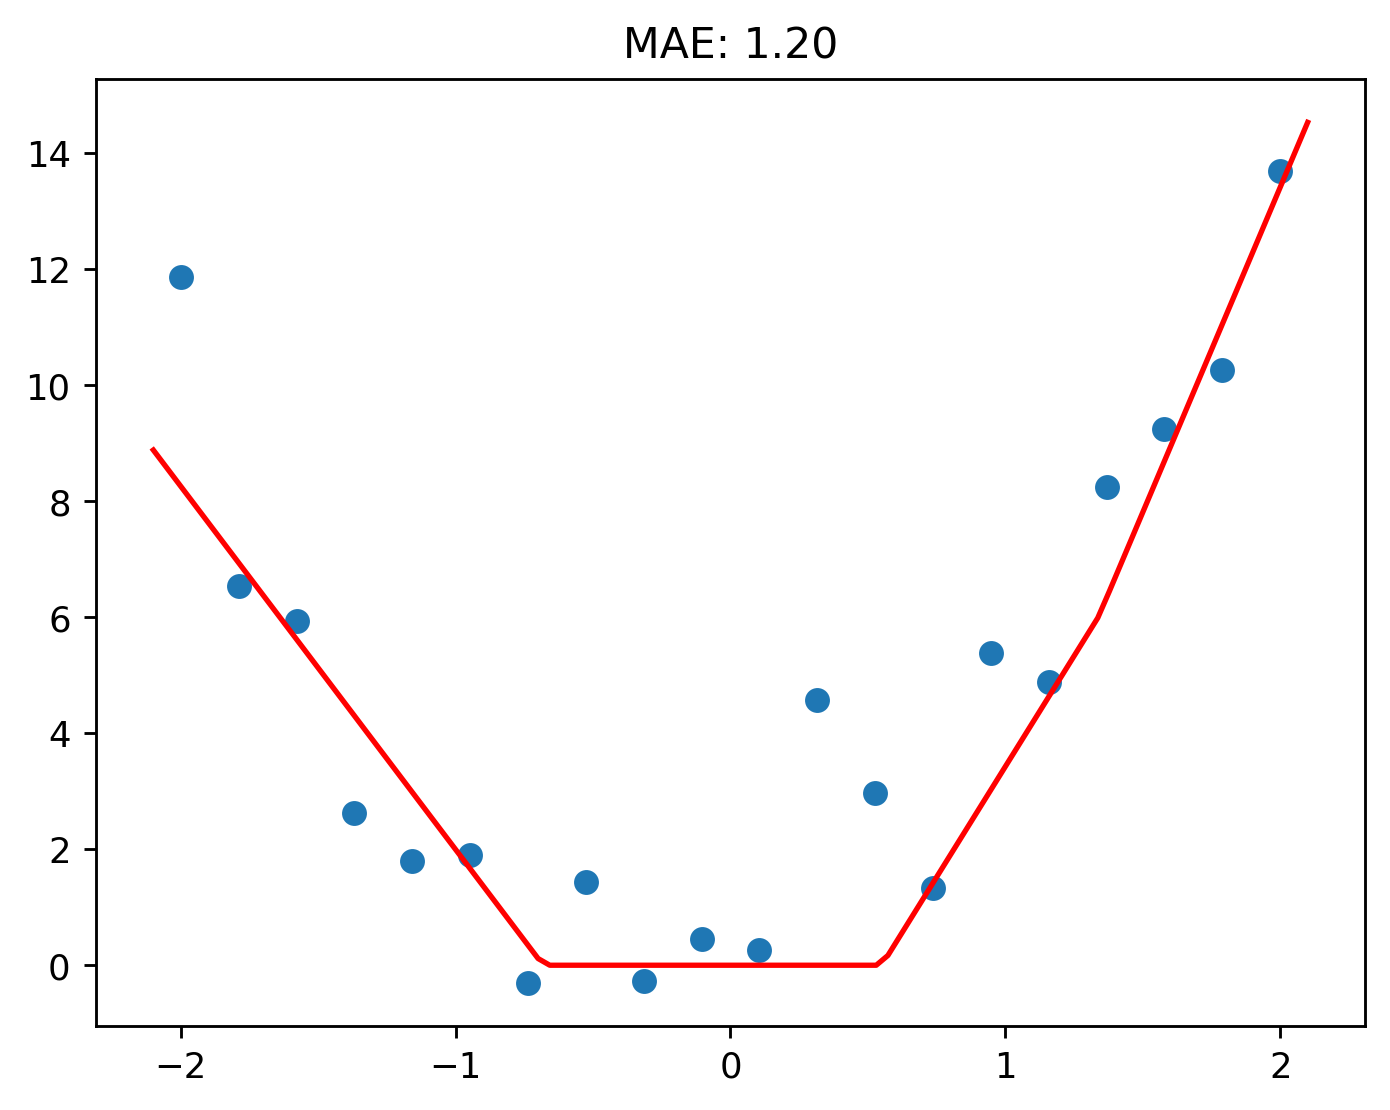

In [31]:
torch.manual_seed(33)
parameters = torch.rand(6).requires_grad_()
train(make_triple_relu, parameters, 35, learning_rate=0.1);

You can see here how the function is adapting to the shape of the data.

With some extra experimentation, I was able to get the loss down to 1.08!

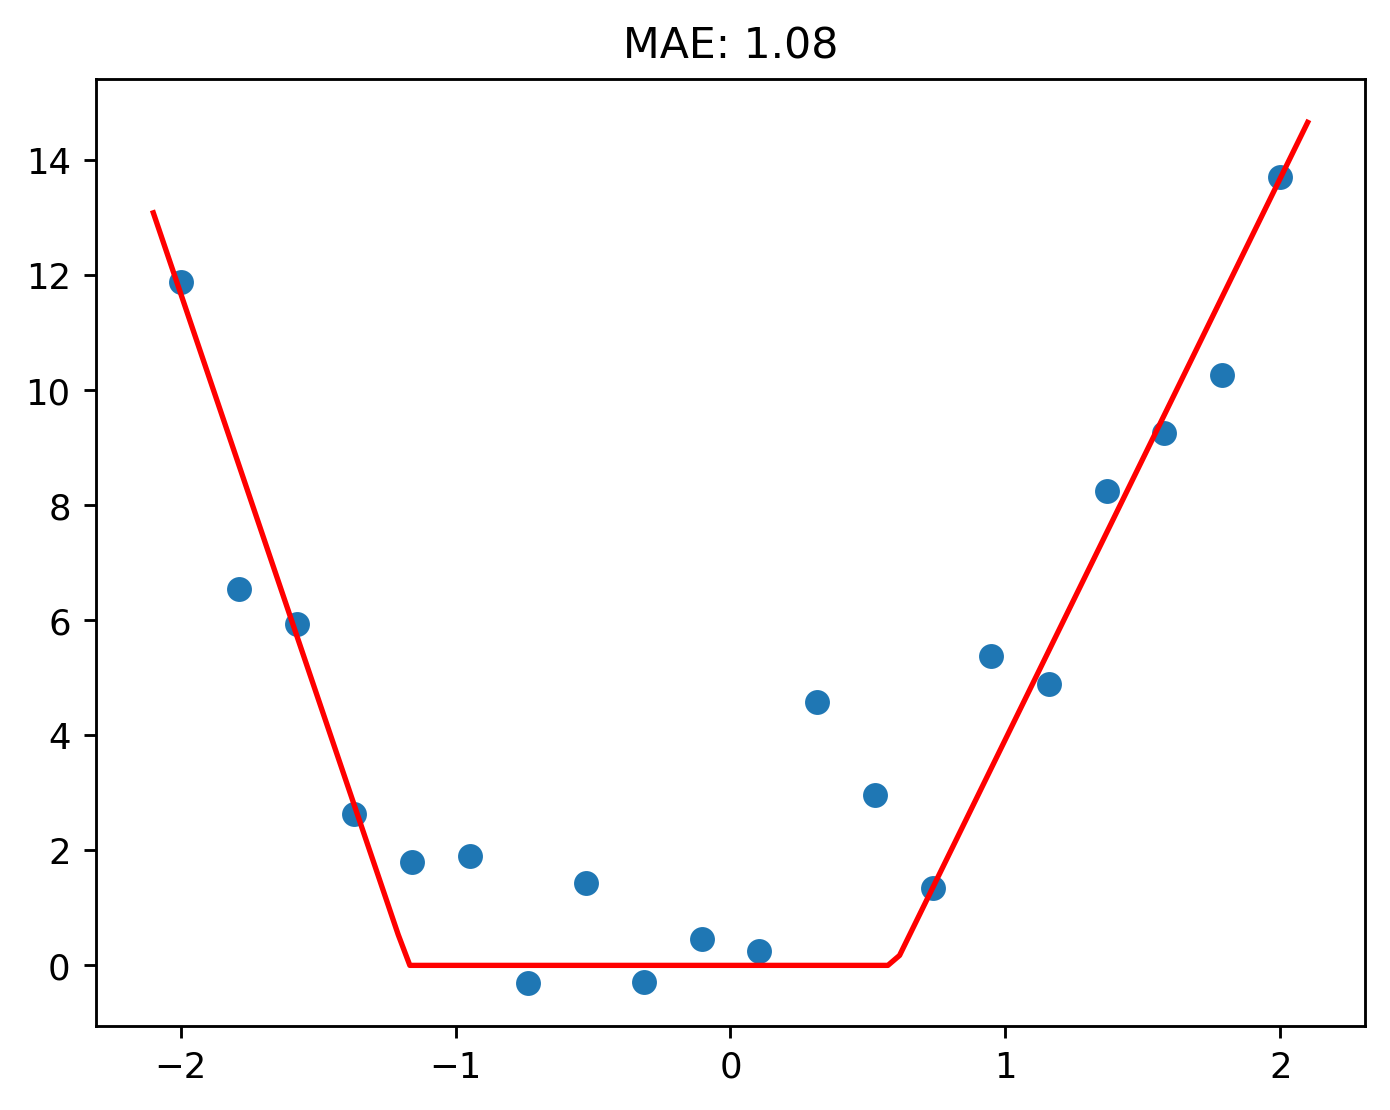

In [32]:
torch.manual_seed(38)
parameters = torch.rand(6).requires_grad_()
train(make_triple_relu, parameters, 196, learning_rate=0.01);

That said, it's not too much of a difference when compared to two ReLUs.

What if we add 5 more to the mix, for a total of 8?

In [33]:
def oct_relu(m1, c1, m2, c2, m3, c3, m4, c4, m5, c5, m6, c6, m7, c7, m8, c8, x):
    # I know there is a better way to do this.
    return relu(m1, c1, x) + relu(m2, c2, x) + relu(m3, c3, x) + relu(m4, c4, x) + relu(m5, c5, x) + relu(m6, c6, x) + relu(m7, c7, x) + relu(m8, c8, x)

def make_oct_relu(m1, c1, m2, c2, m3, c3, m4, c4, m5, c5, m6, c6, m7, c7, m8, c8):
    return partial(oct_relu, m1, c1, m2, c2, m3, c3, m4, c4, m5, c5, m6, c6, m7, c7, m8, c8)


In [34]:
#| output: false
losses = []
for seed in range(50):
    torch.manual_seed(seed)
    parameters = torch.rand(16).requires_grad_()
    losses.append(train(make_oct_relu, parameters, 35, 0.1, False, False))
losses = torch.stack(losses)
print(f"The seed {(losses == torch.min(losses)).nonzero().item()} obtained the lowest loss of {torch.min(losses)}")

The seed 3 obtained the lowest loss of 0.8636786607739326


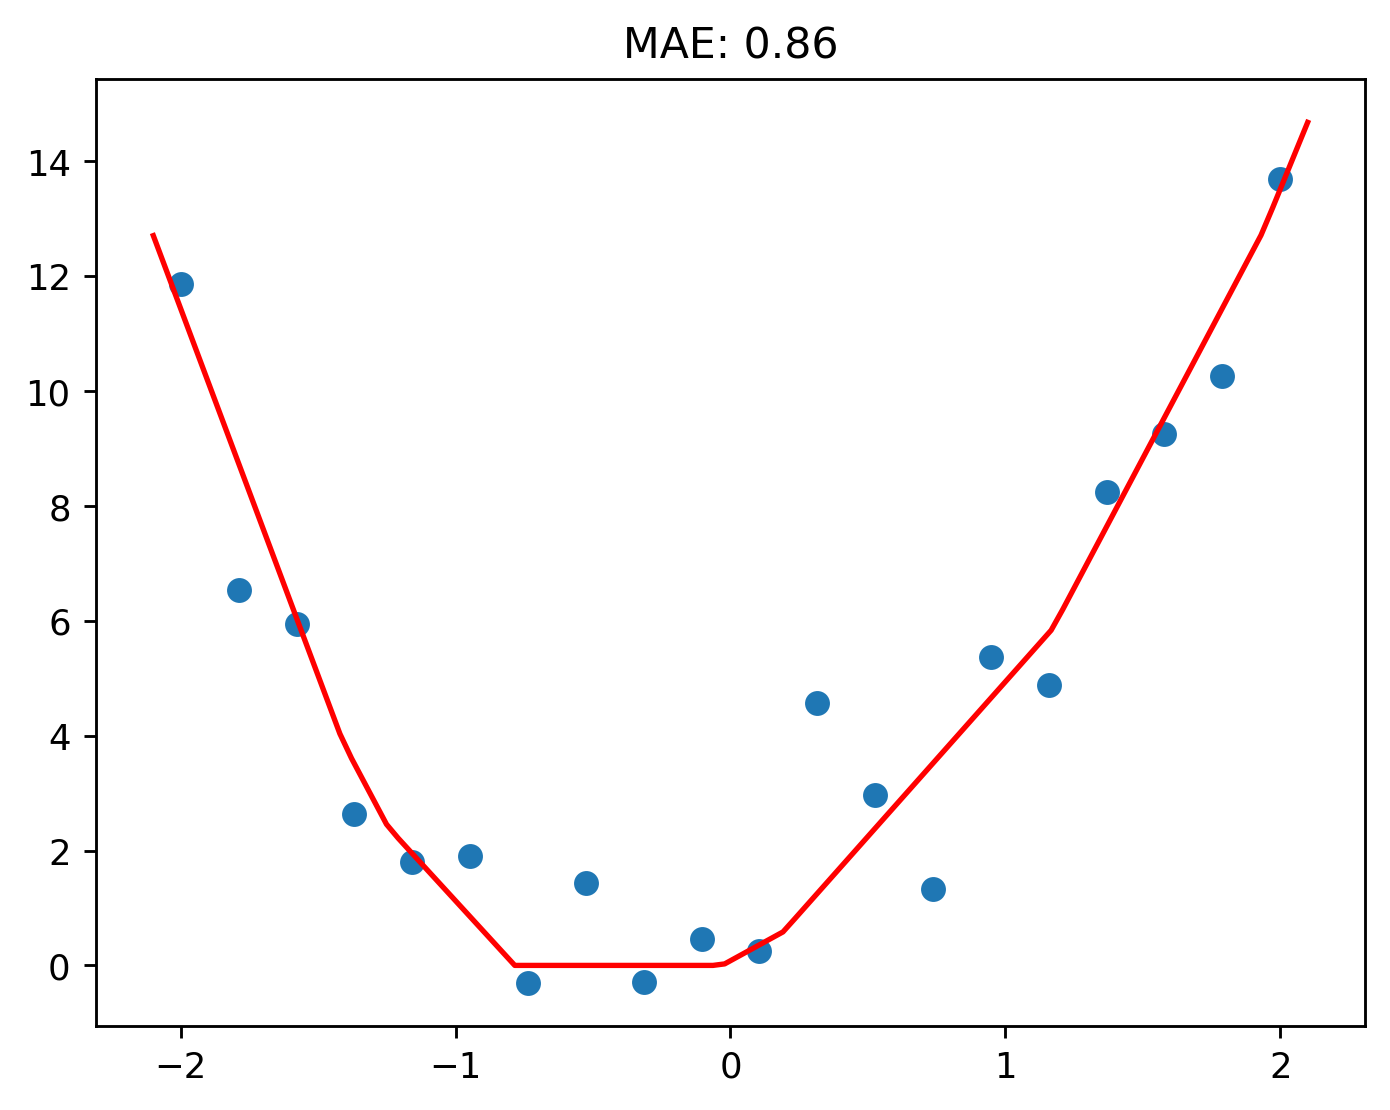

In [35]:
torch.manual_seed(3)
parameters = torch.rand(16).requires_grad_()
train(make_oct_relu, parameters, 35, 0.1, False, True);

Nice! The MAE has gone below 1!

It's even beat the quadratic function from before! With some expermimenting, I had managed to get the quadratic's loss down to 1.03.

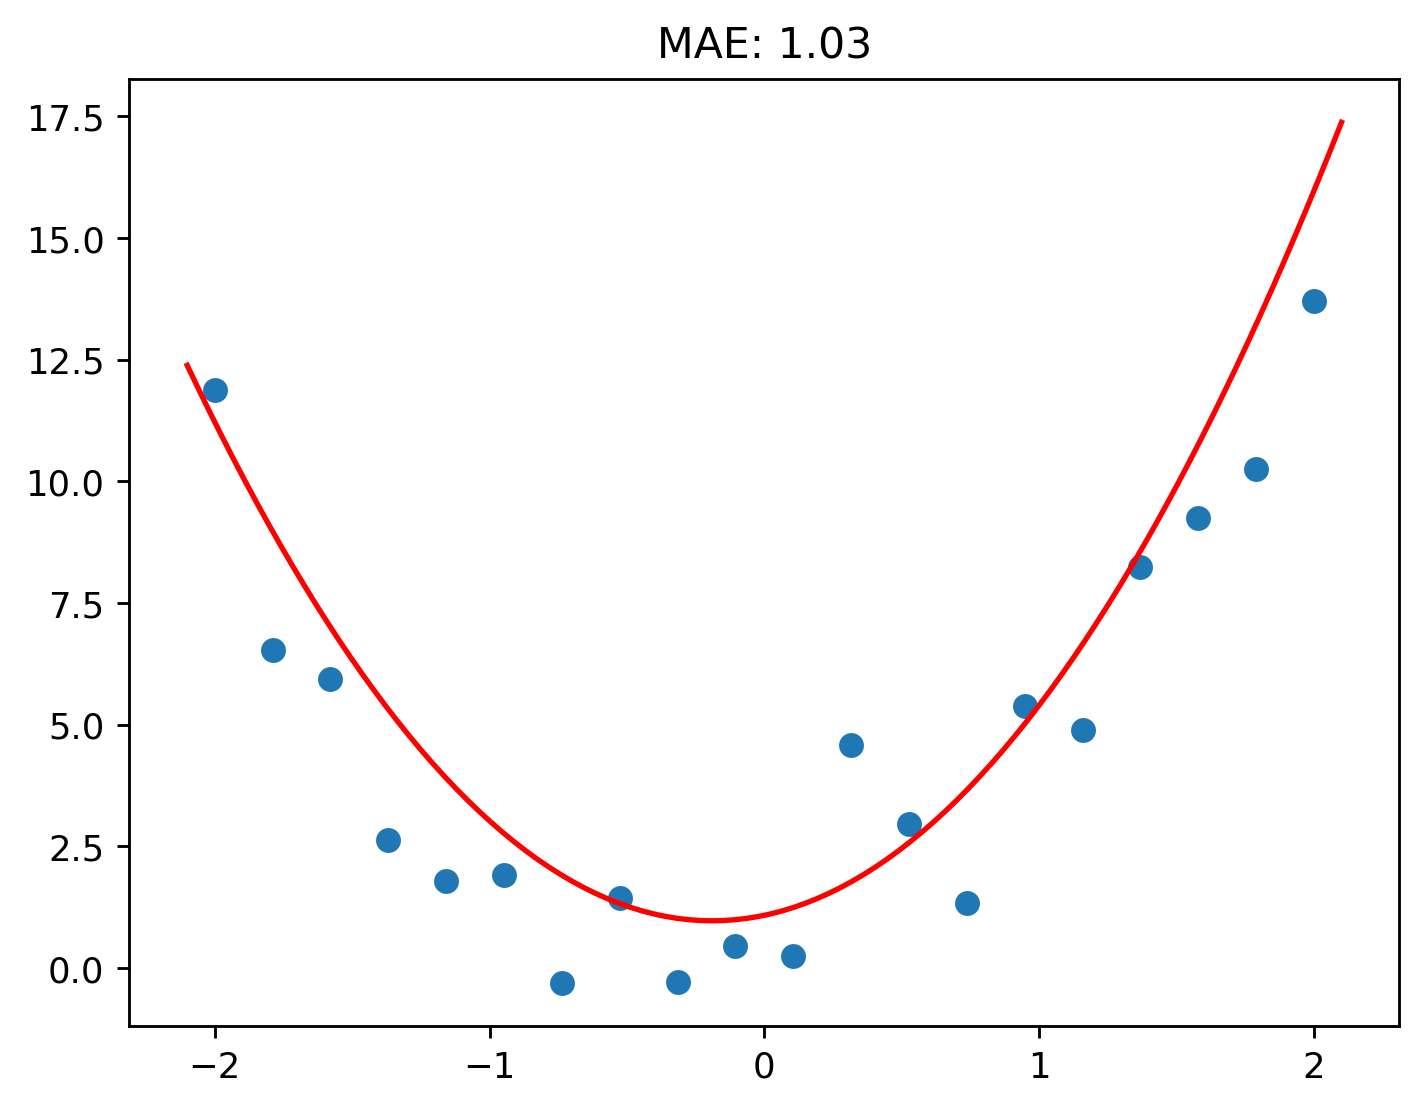

In [36]:
torch.manual_seed(42)
parameters = torch.rand(3).requires_grad_()
train(make_quadratic, parameters, 37, learning_rate=0.5, print_output=False, print_graph=True);

In [37]:
#| output: false
losses = []
for seed in range(50):
    torch.manual_seed(seed)
    parameters = torch.rand(3).requires_grad_()
    losses.append(train(make_quadratic, parameters, 50, 0.05, False, False))
losses = torch.stack(losses)
print(f"The seed {(losses == torch.min(losses)).nonzero().item()} obtained the lowest loss of {torch.min(losses)}")

The seed 0 obtained the lowest loss of 1.0229271452703261


<!-- - Seed 16; 36 passes; lr=0.1
- Seed 42; 37 passes; lr=0.5 -->

Let's use the model that has 8 ReLUs to predict what the object's velocity would be at 1 second.

In [39]:
torch.manual_seed(3)
parameters = torch.rand(16).requires_grad_()
train(make_oct_relu, parameters, 35, 0.1, False, False);

f = make_oct_relu(*parameters)
display(Markdown(f"""
:::{{.callout-tip appearance="default" icon=false}}
# Code Output
The object's speed at 1 s is {f(1):.2} m/s.
:::
"""))


:::{.callout-tip appearance="default" icon=false}
# Code Output
The object's speed at 1 s is 4.9 m/s.
:::


Hmm, yes, that is a bit off. But that is fine because overall, the function is a lot more accurate for all the datapoints.

## Conclusion

See how easy this stuff all is? All those fancy terms makes this feel complex when in reality, it's all really simple.

Why not now go and venture off to learn more and implement your own models!

Below are two free courses I can recommend:

- [Elements of AI](https://www.elementsofai.com)
  
    A great primer into AI. The course goes over the history, the implementations, and the implications of this field, all without needing the knowledge of programming or complex mathematics.

- [Practical Deep Learning for Coders](https://course.fast.ai)
  
    This course is different from other AI courses you'll find. How? Because instead of starting off with the nitty gritty basics, you begin by actually implementing your own simple image classifier (a model that can tell what thing is in an image). You'll be surprised at how simple it is to implement models with minimal code, and how little you need to know to get started (hint: you only really need high-school maths).

**If you have any questions, comments, suggestions, or feedback, please do post them down in the comment section below!**

## Acknowledgements

This article was inspired by the [How does a neural net really work](https://www.kaggle.com/code/jhoward/how-does-a-neural-net-really-work/notebook) Kaggle Notebook by [Jeremy Howard](https://www.kaggle.com/jhoward), and lesson 3 of [Practical Deep Learning for Coders](https://course.fast.ai/Lessons/lesson3.html).